In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
# old settings -> the corresponding model shall be extended
setting_dict = {"particles": 1,
                "epochs": 20,
                "batch_size": 200,    # len(X_train)
                "h_0": 1,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 10

In [6]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]

In [7]:
import time

Epoch 21. Training MSE: 0.489, Test MSE: 0.515.
Epoch 22. Training MSE: 0.489, Test MSE: 0.515.
Epoch 23. Training MSE: 0.489, Test MSE: 0.515.
Epoch 24. Training MSE: 0.489, Test MSE: 0.515.
Epoch 25. Training MSE: 0.488, Test MSE: 0.514.
Epoch 26. Training MSE: 0.488, Test MSE: 0.514.
Epoch 27. Training MSE: 0.488, Test MSE: 0.514.
Epoch 28. Training MSE: 0.488, Test MSE: 0.514.
Epoch 29. Training MSE: 0.488, Test MSE: 0.514.
Epoch 30. Training MSE: 0.488, Test MSE: 0.514.
Calculation time for 100 particles: 7.257317507266999 minutes.


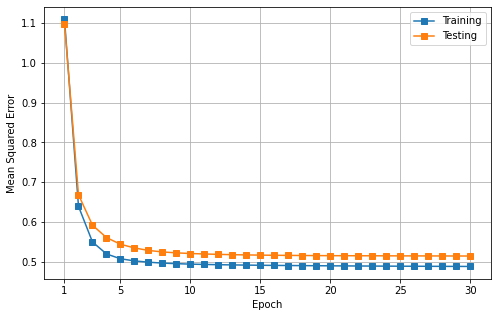

Epoch 21. Training MSE: 0.453, Test MSE: 0.497.
Epoch 22. Training MSE: 0.452, Test MSE: 0.496.
Epoch 23. Training MSE: 0.452, Test MSE: 0.496.
Epoch 24. Training MSE: 0.451, Test MSE: 0.495.
Epoch 25. Training MSE: 0.45, Test MSE: 0.495.
Epoch 26. Training MSE: 0.45, Test MSE: 0.495.
Epoch 27. Training MSE: 0.449, Test MSE: 0.495.
Epoch 28. Training MSE: 0.449, Test MSE: 0.495.
Epoch 29. Training MSE: 0.448, Test MSE: 0.494.
Epoch 30. Training MSE: 0.447, Test MSE: 0.494.
Calculation time for 200 particles: 14.727961484591166 minutes.


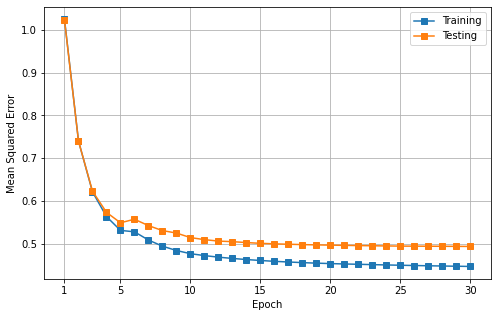

Epoch 21. Training MSE: 0.445, Test MSE: 0.493.
Epoch 22. Training MSE: 0.443, Test MSE: 0.491.
Epoch 23. Training MSE: 0.441, Test MSE: 0.49.
Epoch 24. Training MSE: 0.439, Test MSE: 0.489.
Epoch 25. Training MSE: 0.438, Test MSE: 0.487.
Epoch 26. Training MSE: 0.437, Test MSE: 0.486.
Epoch 27. Training MSE: 0.435, Test MSE: 0.486.
Epoch 28. Training MSE: 0.434, Test MSE: 0.485.
Epoch 29. Training MSE: 0.433, Test MSE: 0.485.
Epoch 30. Training MSE: 0.432, Test MSE: 0.484.
Calculation time for 300 particles: 21.62004453341166 minutes.


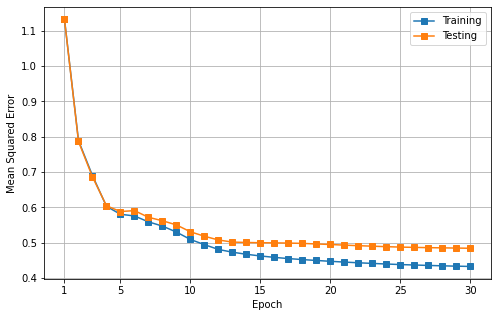

Epoch 21. Training MSE: 0.452, Test MSE: 0.496.
Epoch 22. Training MSE: 0.448, Test MSE: 0.493.
Epoch 23. Training MSE: 0.444, Test MSE: 0.491.
Epoch 24. Training MSE: 0.44, Test MSE: 0.49.
Epoch 25. Training MSE: 0.438, Test MSE: 0.49.
Epoch 26. Training MSE: 0.435, Test MSE: 0.489.
Epoch 27. Training MSE: 0.432, Test MSE: 0.489.
Epoch 28. Training MSE: 0.43, Test MSE: 0.489.
Epoch 29. Training MSE: 0.427, Test MSE: 0.488.
Epoch 30. Training MSE: 0.425, Test MSE: 0.487.
Calculation time for 400 particles: 29.48431105216344 minutes.


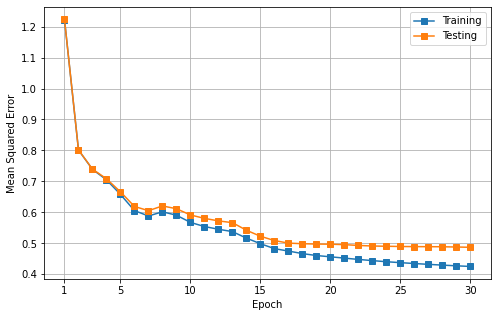

Epoch 21. Training MSE: 0.439, Test MSE: 0.476.
Epoch 22. Training MSE: 0.435, Test MSE: 0.475.
Epoch 23. Training MSE: 0.431, Test MSE: 0.474.
Epoch 24. Training MSE: 0.428, Test MSE: 0.472.
Epoch 25. Training MSE: 0.425, Test MSE: 0.47.
Epoch 26. Training MSE: 0.422, Test MSE: 0.469.
Epoch 27. Training MSE: 0.419, Test MSE: 0.468.
Epoch 28. Training MSE: 0.417, Test MSE: 0.467.
Epoch 29. Training MSE: 0.415, Test MSE: 0.466.
Epoch 30. Training MSE: 0.413, Test MSE: 0.466.
Calculation time for 500 particles: 37.57912820974986 minutes.


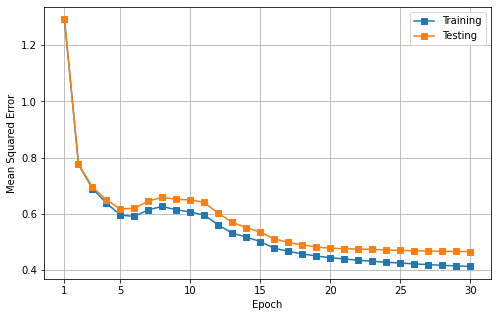

Epoch 21. Training MSE: 0.471, Test MSE: 0.515.
Epoch 22. Training MSE: 0.462, Test MSE: 0.509.
Epoch 23. Training MSE: 0.453, Test MSE: 0.504.
Epoch 24. Training MSE: 0.448, Test MSE: 0.502.
Epoch 25. Training MSE: 0.443, Test MSE: 0.499.
Epoch 26. Training MSE: 0.439, Test MSE: 0.496.
Epoch 27. Training MSE: 0.434, Test MSE: 0.493.
Epoch 28. Training MSE: 0.429, Test MSE: 0.489.
Epoch 29. Training MSE: 0.424, Test MSE: 0.487.
Epoch 30. Training MSE: 0.421, Test MSE: 0.487.
Calculation time for 600 particles: 45.97717438141505 minutes.


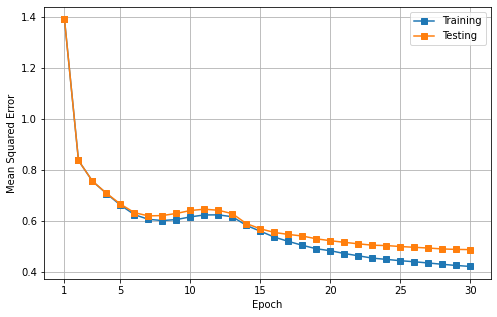

Epoch 21. Training MSE: 0.552, Test MSE: 0.596.
Epoch 22. Training MSE: 0.54, Test MSE: 0.582.
Epoch 23. Training MSE: 0.519, Test MSE: 0.554.
Epoch 24. Training MSE: 0.506, Test MSE: 0.538.
Epoch 25. Training MSE: 0.488, Test MSE: 0.525.
Epoch 26. Training MSE: 0.475, Test MSE: 0.517.
Epoch 27. Training MSE: 0.462, Test MSE: 0.508.
Epoch 28. Training MSE: 0.453, Test MSE: 0.503.
Epoch 29. Training MSE: 0.444, Test MSE: 0.497.
Epoch 30. Training MSE: 0.439, Test MSE: 0.496.
Calculation time for 700 particles: 53.917209923267365 minutes.


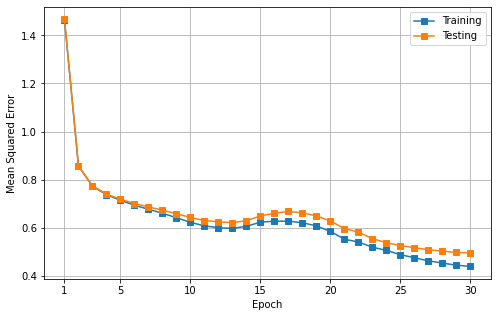

Epoch 21. Training MSE: 0.633, Test MSE: 0.677.
Epoch 22. Training MSE: 0.622, Test MSE: 0.666.
Epoch 23. Training MSE: 0.604, Test MSE: 0.643.
Epoch 24. Training MSE: 0.588, Test MSE: 0.623.
Epoch 25. Training MSE: 0.571, Test MSE: 0.604.
Epoch 26. Training MSE: 0.55, Test MSE: 0.586.
Epoch 27. Training MSE: 0.525, Test MSE: 0.564.
Epoch 28. Training MSE: 0.498, Test MSE: 0.539.
Epoch 29. Training MSE: 0.48, Test MSE: 0.525.
Epoch 30. Training MSE: 0.461, Test MSE: 0.509.
Calculation time for 800 particles: 62.57291075388591 minutes.


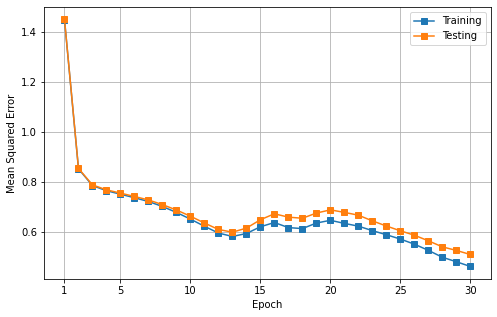

Epoch 21. Training MSE: 0.564, Test MSE: 0.604.
Epoch 22. Training MSE: 0.568, Test MSE: 0.609.
Epoch 23. Training MSE: 0.573, Test MSE: 0.614.
Epoch 24. Training MSE: 0.584, Test MSE: 0.622.
Epoch 25. Training MSE: 0.587, Test MSE: 0.623.
Epoch 26. Training MSE: 0.594, Test MSE: 0.625.
Epoch 27. Training MSE: 0.585, Test MSE: 0.613.
Epoch 28. Training MSE: 0.572, Test MSE: 0.597.
Epoch 29. Training MSE: 0.554, Test MSE: 0.582.
Epoch 30. Training MSE: 0.536, Test MSE: 0.567.
Calculation time for 900 particles: 72.24299904902776 minutes.


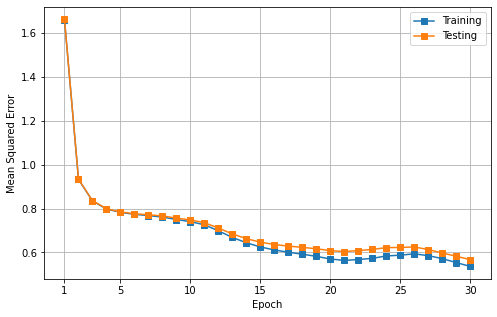

Epoch 21. Training MSE: 0.573, Test MSE: 0.592.
Epoch 22. Training MSE: 0.57, Test MSE: 0.59.
Epoch 23. Training MSE: 0.573, Test MSE: 0.591.
Epoch 24. Training MSE: 0.564, Test MSE: 0.582.
Epoch 25. Training MSE: 0.552, Test MSE: 0.57.
Epoch 26. Training MSE: 0.542, Test MSE: 0.561.
Epoch 27. Training MSE: 0.532, Test MSE: 0.555.
Epoch 28. Training MSE: 0.524, Test MSE: 0.55.
Epoch 29. Training MSE: 0.518, Test MSE: 0.547.
Epoch 30. Training MSE: 0.51, Test MSE: 0.541.
Calculation time for 1000 particles: 80.68968848784765 minutes.


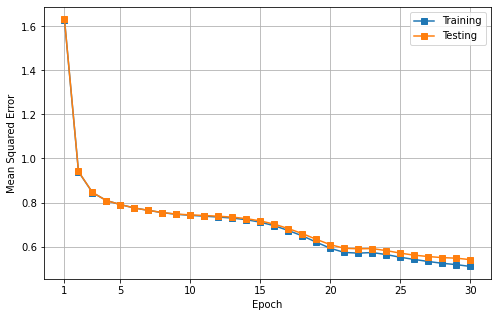

Epoch 21. Training MSE: 0.705, Test MSE: 0.712.
Epoch 22. Training MSE: 0.694, Test MSE: 0.703.
Epoch 23. Training MSE: 0.684, Test MSE: 0.694.
Epoch 24. Training MSE: 0.673, Test MSE: 0.686.
Epoch 25. Training MSE: 0.662, Test MSE: 0.676.
Epoch 26. Training MSE: 0.65, Test MSE: 0.667.
Epoch 27. Training MSE: 0.637, Test MSE: 0.657.
Epoch 28. Training MSE: 0.624, Test MSE: 0.647.
Epoch 29. Training MSE: 0.611, Test MSE: 0.637.
Epoch 30. Training MSE: 0.599, Test MSE: 0.627.
Calculation time for 1500 particles: 128.67105072339376 minutes.


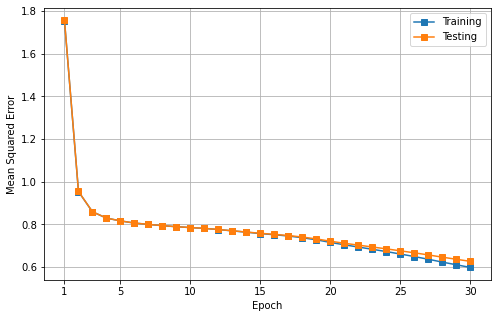

Epoch 21. Training MSE: 0.73, Test MSE: 0.737.
Epoch 22. Training MSE: 0.721, Test MSE: 0.729.
Epoch 23. Training MSE: 0.711, Test MSE: 0.72.
Epoch 24. Training MSE: 0.701, Test MSE: 0.711.
Epoch 25. Training MSE: 0.692, Test MSE: 0.703.
Epoch 26. Training MSE: 0.684, Test MSE: 0.697.
Epoch 27. Training MSE: 0.677, Test MSE: 0.691.
Epoch 28. Training MSE: 0.67, Test MSE: 0.685.
Epoch 29. Training MSE: 0.664, Test MSE: 0.68.
Epoch 30. Training MSE: 0.658, Test MSE: 0.675.
Calculation time for 2000 particles: 183.59031473795574 minutes.


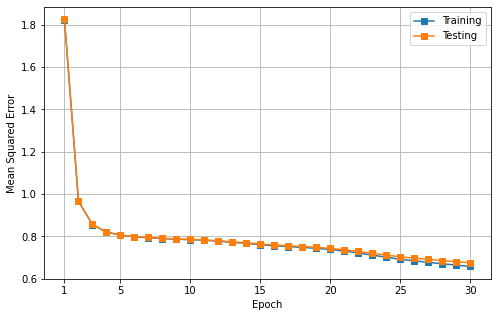

In [8]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor_extension(extend_model = "../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], p, setting_dict["h_0"]),
                                                                                     additional_epochs = additional_epochs,
                                                                                     save_all = True,
                                                                                     verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_epoch_mse(mean_model_train_mse,
                      mean_model_test_mse,
                      mse_mean = None,
                      savefig = True,
                      file = "../img/wine/enkf_wine_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], p, setting_dict["h_0"]))